# Quant 101
## #1 Rendements, Volatilité et Corrélations en Python

## Introduction à la série d'ateliers Quant 101

### Objectif général
Offrir une base solide et concrète, en reliant les concepts financiers à leur application directe en Python.

### Approche pédagogique
**Chaque atelier** : un nouveau concept et une mise en pratique interactive.

Tous les notebooks seront accessibles publiquement pour te permettre d'expérimenter, modifier et approfondir à ton rythme.

L'objectif est de créer des outils concrets : un recueil de concepts clés que tu peux exploiter pour tes projets personnels, tes études ou ton portfolio.

### Philosophie Quant 101
Comprendre les marchés par les données.  
Transformer les idées en solutions réelles, étape par étape.

## Au programme aujourd'hui:
1. Téléchargement et traitement de données avec *Yfinance* et *Pandas*
2. Calcul de rendements simples et logarithmiques
3. Calcul et interprétation de volatilité
4. Calcul et visualisation de corrélations
5. Lien entre corrélations et optimisation de portfolios

In [ ]:
# Import de modules utiles

import yfinance as yf           # Données financières
import pandas as pd             # Traitement de données
import matplotlib.pyplot as plt # Visualisation de graphiques
import ipywidgets as widgets   # Visualisation de graphiques
from ipywidgets import interact # Visualisation de graphiques
import seaborn as sns           # Visualisation de graphiques
import numpy as np              # Calculs et traitement de données

plt.style.use("seaborn-v0_8-darkgrid")

On commence par télécharger des données pour une liste d'actifs qui nous intéressent.

In [ ]:
tickers = [] # Vos propres tickers

# Ou choisissez parmi une liste de secteurs
tech = ["AAPL", "MSFT", "NVDA", "GOOGL", "META"]
financials = ["JPM", "BAC", "GS", "MS", "WFC"]
industrials = ["GE", "CAT", "BA", "HON", "LMT"]
energy = ["XOM", "CVX", "COP", "SLB", "OXY"]
healthcare = ["JNJ", "PFE", "MRK", "LLY", "UNH"]
consumer_discretionary = ["AMZN", "TSLA", "HD", "NKE", "SBUX"]
consumer_staples = ["PG", "KO", "PEP", "WMT", "COST"]
materials = ["DOW", "NEM", "FCX", "LIN", "ALB"]
utilities = ["NEE", "DUK", "SO", "EXC", "AEP"]
real_estate = ["PLD", "AMT", "SPG", "O", "DLR"]


"""
Paramètres importants de yf.download() :

tickers : liste des actifs que l'on veut
period : période historique
interval : fréquence des données
start et end (si on utilise pas period) : début et fin de l'intervalle pour les données en format "YYYY-MM-JJ"

yf.download() nous donne un DataFrame contenant High, Low, Close. Si on s'intéresse juste au Close, on choisit par index ["Close"]
"""

prices = yf.download(tickers=tickers, period="5y")["Close"] # Changer tickers pour le secteur que vous avez choisi si c'est le cas

# Pandas nous offre les fonctions tail() et head() qui servent à afficher les 5 dernières ou 5 premières données respectivement
prices.tail()

In [ ]:
# On peut les visualiser rapidement avec la fonction plot() de pandas. Moins flexible que ce qui est offert par Matplotlib, mais rapide

prices.plot(title="Prix à intervalle de 1j", figsize=(12,6))

On peut tester avec des périodes et des intervalles différentes

In [ ]:
# Choisissez la période et l'intervalle qui vous intéresse
period = "" # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd
interval = "" # 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo ****** Intraday data seulement pour period < 60j

new_prices = yf.download(tickers=tickers, period=period, interval=interval)["Close"]

new_prices.plot(title=f"Prix à intervalle de {interval} sur une période de {period}", figsize=(12,6))

## Rendements

1. Rendements simples
$$
r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1 \tag{1}
$$
2. Rendements logarithmiques
$$
z_t = \ln(1+r_t) = \ln(\frac{p_t}{p_{t-1}}) \tag{2}
$$

### Rendements cumulatifs
1. Avec les rendements simples (on assume composés) :
$$
r_{0:T} = \frac{p_T}{p_0} - 1 = \prod_{t=1}^{T}(1+r_t) - 1 \tag{3}
$$

2. Avec les rendements logarithmiques :  
À partir des équations (1) et (3)
$$
z_{0:T} = \ln(1+r_{0:T}) = \sum_{t=1}^{T}\ln(1+r_t) = \sum_{t=1}^{T}z_t \tag{4}
$$
À partir de (4), on peut aussi dériver une autre équation utile :
$$ z_{0:T} = \ln(p_T) - \ln(p_0) \tag{5}$$

### Avantages des rendements logarithmiques
#### Propriété additive
Selon l'équation (4), on remarque que les rendements logarithmiques sont additifs. Si on a les rendements quotidiens, et on veut le rendement cumulatif sur une période, on peut simplement les additionner. Ça rend la vie beaucoup plus facile lorsqu'on fait des calculs statistiques et de la modélisation.
#### Distribution
Par la propriété additive, les rendements logarithmiques s'agrèrent comme une somme de variables aléatoires. Selon le Central Limit Theorem (CLT), cette somme tend vers une distribution normale.
Ça rend encore la vie beaucoup plus facile lorsqu'on fait des calculs statistiques et de la modélisation.
#### Approximation
Pour des rendements $ |r| << 1 $, on détermine avec les séries Taylor une relation utile :
$$
\ln(1+x) \approx x $$  

Les rendements logarithmiques sont approximativement égaux aux rendements simples pour des périodes courtes et des petits rendements.
On peut donc interpréter les log-returns comme des rendements “en pourcentage”, tout en gardant leurs avantages analytiques.





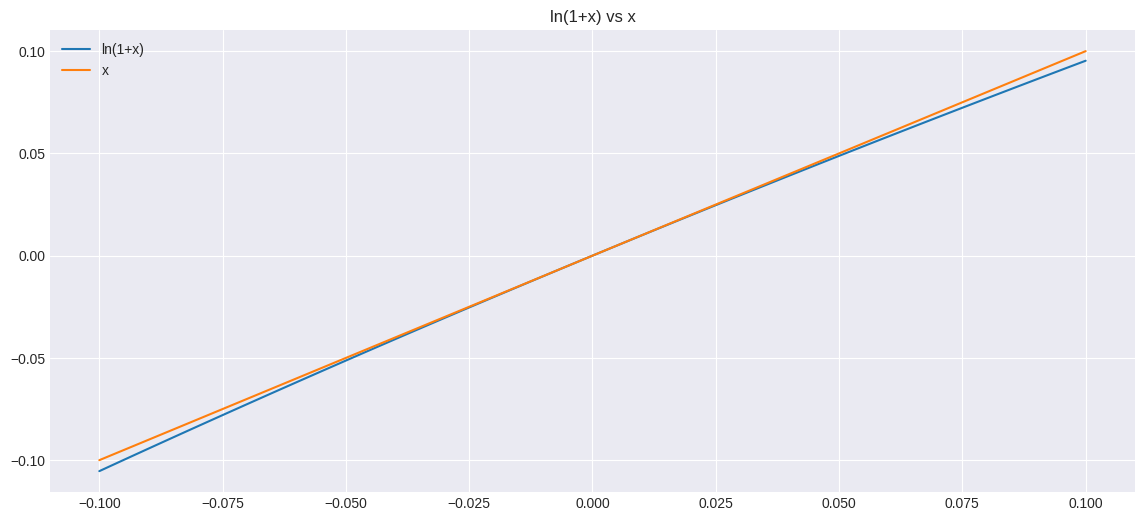

In [11]:
x = np.linspace(-0.1,0.1, 100)
Y = pd.DataFrame({"ln(1+x)" : np.log(1+x), "x" : x})

plt.figure(figsize=(14,6))
plt.plot(x, Y)
plt.legend(Y.columns)
plt.title("ln(1+x) vs x")

plt.show()

Comment calculer les rendements dont on vient de parler

In [ ]:
# Calculons ces rendements
last_prices = prices.tail(30)

# Simples
pct_returns = last_prices.pct_change().dropna()

# Logarithmiques
log_returns = np.log(last_prices / last_prices.shift(1)).dropna()

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].plot(pct_returns)
ax[0].set_title("Rendements simples")
ax[0].legend(labels=pct_returns.columns)

ax[1].plot(log_returns)
ax[1].set_title("Rendements logarithmiques")
ax[1].legend(labels=log_returns.columns)

plt.show()

Rendements cumulatifs

In [ ]:
# Calculons les rendements cumulatifs

cum_log_returns = log_returns.cumsum()
# ex : [1, 2, -1, 4].cumsum() = [1, 3, 2, 6]

plt.figure(figsize=(12,6))
plt.plot(cum_log_returns)
plt.title("Rendements logarithmiques cumulatifs")
plt.legend(labels=log_returns.columns)

plt.show()


## Volatilité

### Définition
L'écart-type des rendements, soit $ σ = \sqrt{Var(r_t)}$

Il est important à noter que la volatilité est définie sur les rendements et non le prix, car les rendements sont normalement distribués.

### Intuition
La volatilité nous dit à quel point les rendements dévient de leur moyenne.  


### Implicite vs réalisée

1. Réalisée  
La plus simple, la volatilité calculée comme l'écart-type de rendements historiques (1 semaine, 1 mois, 3 mois, etc.)

2. Implicite  
Extraite des prix d'options, reflète les anticipations futures des marchés.

On se concentre sur les réalisées, car ils sont plus simples à comprendre pour l'instant.

### Annualisation
On s'intéresse souvent à la volatilité mise sur la base d'un an.  
Si l'on a la volatilité quotidienne, on peut l'annualiser selon :
$$
σ_{annuelle} = \sqrt{252}σ_{quotidienne}
$$  

On peut démontrer cette égalité avec la définition de la variance.
À noter qu'on utilise 252, car il y a 252 jours de bourse dans l'année. Pour d'autres actifs 24/7 (e.g. crypto) on utiliserait 365.

### Volatilité dynamique
La volatilité varie dans le temps, elle n'est jamais la même.  
On la calcule sur une période historique déterminée, mais on n'a aucune certitude que celle-ci restera la même.

In [ ]:
# Volatilité calculée sur l'entiereté de la période historique

vol_daily = pct_returns.std()
vol_annual = vol_daily * np.sqrt(252)

print("Volatilité des actifs :")
for ticker in vol_daily.index :
  print(f"{ticker} : quotidienne = {vol_daily[ticker]:.2%}, annuelle = {vol_annual[ticker]:.2%}")


On peut visualiser la volatilité dynamique sur un *rolling window*

In [ ]:
# Choisissez un actif parmi votre secteur et une taille de window
ticker = ""
vol_window = 60

vol_rolling = np.sqrt(252) * pct_returns[ticker].rolling(vol_window).std()

plt.figure(figsize=(12,6))
plt.plot(vol_rolling)
plt.title(f"Volatilité annualisée de {ticker} selon une fenêtre de {vol_window} jours")

## Corrélations

### Définition
La corrélation entre deux actifs, $ ρ_{ij} = \frac{Cov(r_i, r_j)}{σ_iσ_j} $

La covariance donne une mesure sensible à l'échelle et peu interprétable. Lorsqu'on divise par le produit des écart-types, on obtient une valeur entre -1 et +1.

### Intuition
La corrélation quantifie à quel point deux actifs bougent ensemble.

Deux actions montent et descendent ensemble : corrélation = +1  
Deux actions bougent en direction opposées : corrélation = -1  
Deux actions bougent indépendamment : corrélation = 0

### Importance en finance
Le risque d'un portfolio n'est pas seulement la somme des risques.

Il dépend des corrélations.  
Exemple intuitif :  
Si deux actifs bougent toujours dans la même direction (corr = 1), le risque associé à un portfolio qui tient les deux sera doublés (si un descend, les deux descendent).  
Si deux actifs bougent de manières opposées (corr = -1), le risque est moindre (si un descend, l'autre monte).

### Corrélation dynamique
Tout comme la volatilité :  
La corrélation varie dans le temps, elle n'est jamais la même.  
On la calcule sur une période historique déterminée, mais on n'a aucune certitude que celle-ci restera la même.

### Limites
1. La corrélation n'explique que les relations linéaires. Si deux actifs ont une dépendance quadratique, par exemple, la corrélation ne le reflètera pas.
2. Corrélation $\neq$ causalité. Une corrélation n'implique pas qu'un explique l'autre.

In [ ]:
# Exemple / Exercice

# Essayer de deviner les corrélations selon le prix de certains actifs

exercice_tickers = ["NVDA", "MSFT", "TLT"]
exercice_prices = yf.download(exercice_tickers, period="1y")["Close"]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 6))
ax1.plot(exercice_prices["NVDA"])
ax1.set_title("Prix de NVDA")

ax2.plot(exercice_prices["MSFT"])
ax2.set_title("Prix de MSFT")

ax3.plot(exercice_prices["TLT"])
ax3.set_title("Prix de TLT")

On va calculer les corrélations et les vérifier

In [ ]:
# La corrélation (ou covariance) entre des actifs se présente sous la forme de matrice (chacun avec un autre)
# On peut repésenter des matrices de manière élégante avec les heatmap de seaborn

exercice_returns = exercice_prices.pct_change().dropna()
exercice_corr_matrix = exercice_returns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(exercice_corr_matrix, cmap="coolwarm", annot=True)

De quoi ont l'air les covariances et les corrélations pour nos actifs qu'on a sélectionné plus tôt?

In [ ]:
# On va voir la différence entre covariance et corrélation

cov_matrix = pct_returns.cov()
corr_matrix = pct_returns.corr()

fig, ax = plt.subplots(1, 2, figsize=(20,6))
sns.heatmap(cov_matrix, annot=True, ax=ax[0], cmap="coolwarm")
ax[0].set_title("Matrice de covariance")

sns.heatmap(corr_matrix, annot=True, ax=ax[1], cmap="coolwarm")
ax[1].set_title("Matrice de corrélation ")

plt.show()

On peut aussi visualiser les corrélations dynamiques

In [ ]:
# On va visualiser l'évolution des corrélations à travers le temps

# Choisissez deux acrifs et une taille de window
ticker1 = ""
ticker2 = ""
corr_window = 60

correlations = pct_returns[ticker1].rolling(corr_window).corr(pct_returns[ticker2])

plt.figure(figsize=(12,6))
plt.plot(correlations)
plt.title(f"Corrélation entre {ticker1} et {ticker2} selon une window de {corr_window} jours")

Pour récapituler, voici un petit *dashboard* qui sert à visualiser ce dont on a parlé aujourd'hui pour une liste d'actifs

In [ ]:
# Entrez des actifs qui vous intéressent dans la section "Custom"

sectors = {
    "Tech": ["AAPL", "MSFT", "GOOG", "NVDA", "AMD"],
    "Finance": ["JPM", "BAC", "GS", "MS", "C"],
    "Energy": ["XOM", "CVX", "COP", "BP"],
    "Consumer": ["PG", "KO", "PEP", "WMT", "MCD"],
    "Custom": []
}

def get_data(tickers, start="2022-01-01"):
    data = yf.download(tickers, start=start)["Close"]
    return data

sector_data = {sector : get_data(tickers) for sector, tickers in sectors.items() if tickers}

def dashboard(sector, window, metric):
    data = sector_data[sector]
    returns = np.log(data / data.shift(1)).dropna()

    if metric == "Price":
        data.plot(title=f"{sector} Sector: Prices", figsize=(12,6))

    elif metric == "Volatility":
        vol = returns.rolling(window).std() * np.sqrt(252)
        vol.plot(title=f"{sector} Sector: Rolling {window}-day Volatility", figsize=(12,6))

    elif metric == "Correlation":
        corr = returns.corr()
        sns.heatmap(corr, annot=True, cmap="coolwarm")
        plt.title(f"{sector} Sector Correlation Matrix")

    plt.show()

In [ ]:
interact(
    dashboard,
    sector=widgets.Dropdown(options=list(sector_data.keys()), value="Tech"),
    metric=widgets.RadioButtons(options=["Price", "Volatility", "Correlation"]),
    window=widgets.IntSlider(value=30, min=5, max=120, step=5),
)